In [36]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Loading data from local files
folder_path = "B:\\shoebox\\EO\\rospin\\courses\\1\\Date_antrenare\\planesnet"
data_file = "planesnet.json"

data = pd.read_json(os.path.join(folder_path, data_file))

In [3]:
data.head(3)

,data,labels,locations,scene_ids
0,"[206, 195, 187, 183, 177, 175, 174, 193, 198, ...",1,"[-118.40497658522878, 33.940618514147936]",20170620_175442_0e30
1,"[215, 209, 200, 196, 192, 197, 205, 168, 155, ...",1,"[-122.392469714, 37.6176425378]",20161212_180859_0e30
2,"[204, 214, 220, 219, 213, 205, 198, 193, 199, ...",1,"[-122.397578597, 37.6209247852]",20170524_181349_0e2f


In [4]:
data.columns

Index(['data', 'labels', 'locations', 'scene_ids'], dtype='object')

(1200,)
(3, 400)
(400, 3)


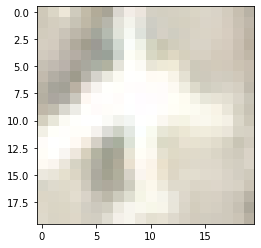

In [30]:
# Representing the image as a vector
# Extracting the 30th image from our dataset
image = np.array(data['data'][30])
print(image.shape)

# This image is not in the right format, therefore we separate it into 3 channels (RGB)
# Note that the images are 20x20 px
image = image.reshape(3, 20*20)
print(image.shape)

# Transposing the image
image = image.T
print(image.shape)

# Bringing the image to the proper shape (20, 20, 3)
image = image.reshape(20, 20, 3)

# Plot image 
plt.imshow(image)

24000
8000


<BarContainer object of 2 artists>

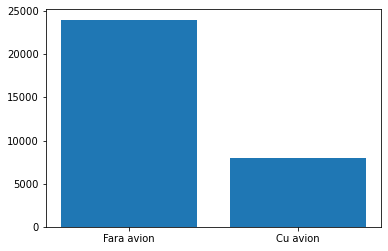

In [31]:
labels_0 = data.loc[data['labels'] == 0]
labels_1 = data.loc[data['labels'] == 1]

print(len(labels_0))
print(len(labels_1))

# Plot histogram of labels
plt.clf() # clear 
plt.bar(['Fara avion', 'Cu avion'], [len(labels_0),len(labels_1)])

In [35]:
# Construct the vectors that the model can work for 
# X - examples (our images)
# Y - labels (whether there is a plane or not)

# Construct X
x = []
for iterator, row in data.iterrows():
    image = np.array(row['data'])
    
    # Channels first
    image = image.reshape(3, 20*20)
    
    # Transpose
    image = image.T
    
    # Reshape
    image = image.reshape(20, 20, 3)
    
    # Put image in X vector
    x.append(image)

x = np.array(x)

# Construct Y 
y = np.array(data['labels'])

print(x.shape)
print(y.shape)

(32000, 20, 20, 3)
(32000,)


In [37]:
# Split data into train and test sets 
# 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
# Needs to get the size of x_train as an input
scalar = MinMaxScaler()
scalar.fit()